<a href="https://colab.research.google.com/github/akshaysp97/Pattern-Recognition-and-Machine-Learning/blob/master/Wireless%20Indoor%20Localization/Final%20Code/Feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install -U yellowbrick                                              #Citation - pypi.org yellowbrick documentation

     |████████████████████████████████| 266kB 2.7MB/s 
  Found existing installation: yellowbrick 0.9.1
    Uninstalling yellowbrick-0.9.1:
      Successfully uninstalled yellowbrick-0.9.1


In [ ]:
import pandas as pd
from feature_generation import get_features
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from yellowbrick.model_selection import FeatureImportances
import xgboost
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
#Read Training data
df = pd.read_csv('D_Train1.csv')                                                   #Citation - pandas API reference documentation
X = df.drop(columns = ['Location'])
y = df['Location']

In [ ]:
X = get_features(X)

In [ ]:
X.shape 

(1600, 452)

In [ ]:
#Fill NA/NaN values
X.fillna(0, inplace=True)                                                          #Citation - pandas API reference documentation

In [ ]:
#Feature ranking with recursive feature elimination.
estimator = xgboost.XGBClassifier(tree_method = 'gpu_hist')                       #Citation - xgboost.readthedocs.io xgboost API reference documentation
selector = RFE(estimator, verbose = 0, n_features_to_select = 40)                 #Citation - scikit-learn.org sklearn API reference documentation

In [ ]:
selector.fit(X, y)

RFE(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                            colsample_bylevel=1, colsample_bynode=1,
                            colsample_bytree=1, gamma=0, learning_rate=0.1,
                            max_delta_step=0, max_depth=3, min_child_weight=1,
                            missing=None, n_estimators=100, n_jobs=1,
                            nthread=None, objective='binary:logistic',
                            random_state=0, reg_alpha=0, reg_lambda=1,
                            scale_pos_weight=1, seed=None, silent=None,
                            subsample=1, tree_method='gpu_hist', verbosity=1),
    n_features_to_select=40, step=1, verbose=0)

In [ ]:
#Select the best features 
selected = [X.columns[i] for i in selector.get_support(indices=True)]             #Citation - scikit-learn.org sklearn API reference documentation

In [ ]:
selected

['WS1',
 'WS2',
 'WS3',
 'WS4',
 'WS5',
 'WS6',
 'WS7',
 'mean',
 'std',
 'WS1_scaled',
 'WS2_scaled',
 'WS3_scaled',
 'WS4_scaled',
 'WS5_scaled',
 'WS1_max_ws',
 'WS1_max_ws_dist',
 'WS1_scaled_max_ws_dist',
 'WS3_scaled_max_ws_dist',
 'WS5_scaled_max_ws_dist',
 'WS1_min_ws_dist',
 'WS4_min_ws_dist',
 'WS7_min_ws_dist',
 'mean_min_ws_dist',
 'std_min_ws_dist',
 'WS1_scaled_min_ws_dist',
 'WS2_scaled_min_ws_dist',
 'WS4_scaled_min_ws_dist',
 'WS5_scaled_min_ws_dist',
 'WS7_scaled_min_ws_dist',
 'WS2_max_ws_min_ws_dist',
 'WS4_scaled_max_ws_min_ws_dist',
 'WS5_scaled_max_ws_min_ws_dist',
 'WS3_max_ws_dist_min_ws_dist',
 'WS6_scaled_max_ws_dist_min_ws_dist',
 'WS1_scaled_min_max_dist',
 'WS5_max_ws_dist_min_max_dist',
 'mean_max_ws_dist_min_max_dist',
 'WS2_scaled_max_ws_dist_min_max_dist',
 'WS3_scaled_max_ws_dist_min_ws_dist_min_max_dist',
 'WS5_scaled_max_ws_dist_min_ws_dist_min_max_dist']

In [ ]:
X = X[selected]

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


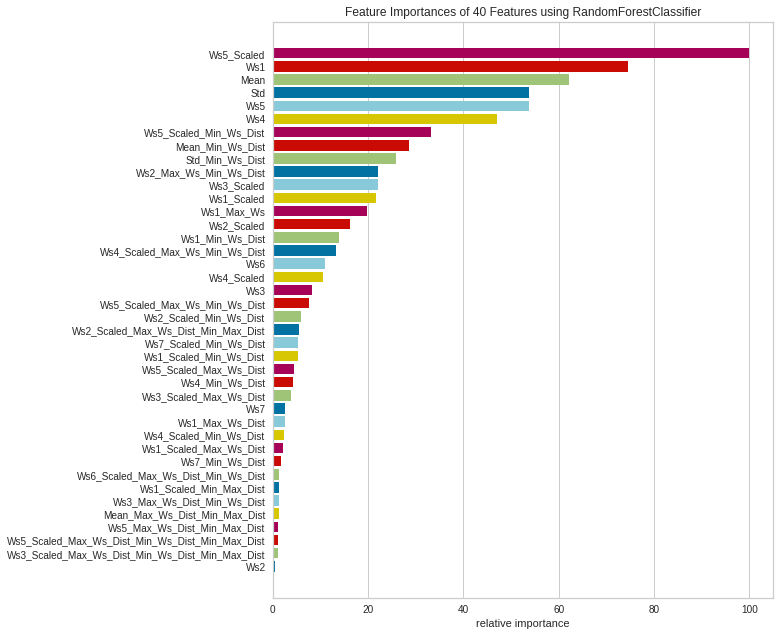

In [ ]:
plt.figure(figsize=(11,9))
ax = plt.gca()                                                                    #Citation - from matplotlib.org matplotlip API reference documentation

# Title case the feature for better display and create the visualizer
model = RandomForestClassifier(n_jobs = -1)                                       #Citation - scikit-learn.org sklearn API reference documentation
labels = list(map(lambda s: s.title(), X.columns))  
viz = FeatureImportances(model, labels=labels, relative=True)                     #Citation - scikit-yb.org yellowbrick documentation 

# Fit and show the feature importances
viz.fit(X, y)
viz.show(ax=ax)